# [2] Algorithms: Different Hashing Methods

## Calculate a 2-digit hash number, which is the first two digits of the input number

In [18]:
number = int(input("Bitte Integer Zahl eingeben: "))
hash_index = 0

while number > 0:
    
    r = number % 10
    print(hash_index, r, number)
    number //= 10
    hash_index = (hash_index// 10) + r*10
    
print(hash_index)

Bitte Integer Zahl eingeben: 588964
0 4 588964
40 6 58896
64 9 5889
96 8 588
89 8 58
88 5 5
58


## Hashfunktion: Divisionsrestverfahren  (engl: division/ remainder method)
h(k) = k % m mit m als Größe der Hash-Tabelle (Primzahl gut geeignet)

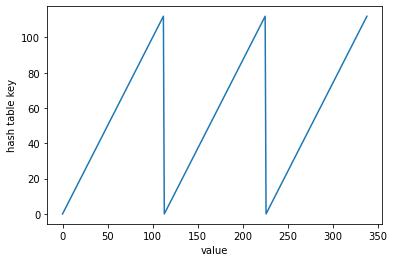

In [38]:
import matplotlib.pyplot as plt
import numpy as np

hash_table_size = 113
xpoints = [i for i in range(3*hash_table_size)]
ypoints = [(j % hash_table_size) for j in xpoints]
# print(*zip(xpoints, ypoints))
plt.plot(xpoints, ypoints)
plt.xlabel('value')
plt.ylabel('hash table key')
plt.show()


## Hashfunktion: Multiplikationsverfahren

In [51]:
import math
k = [17, 1, 29, 500, 1000]
hash_table_size = 29
irrational_number = math.sqrt(2)  # or pi or e

for key in k:
    ak = irrational_number * key
    hash_address = int(((ak - ak // 1)* hash_table_size) // 1)
    print(f'hash address for key = {key}: {hash_address}')

hash address for key = 17: 1
hash address for key = 1: 12
hash address for key = 29: 0
hash address for key = 500: 3
hash address for key = 1000: 6


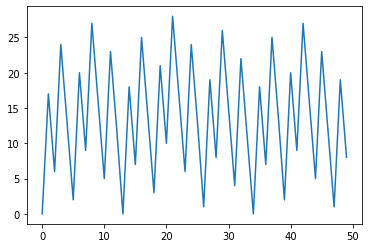

In [57]:
import matplotlib.pyplot as plt

# Multiplikationsverfahren
def calc_hash_address(key):
    hash_table_size = 29
    irrational_number = (math.sqrt(5)-1)/2
    ak = irrational_number * key
    return int(((ak - ak // 1)* hash_table_size) // 1)
    
xpoints = [i for i in range(50)]
ypoints = [calc_hash_address(i) for i in xpoints]

plt.plot(xpoints, ypoints)
plt.show()

## Hashfunktion: Faltungsmethode

In [80]:
def calc_hash_address2(key):
    n = len(str(key)) // 2
    hash_address = 0
    hash_table_length = 17
    
    # devide long number into two groups of digits e.g. 587653 into 587 and 653
    for i in range(n):
        r = key % 10
        key = key // 10
        hash_address = hash_address // 10 + int(r * math.pow(10,n-1))
    
    print("intermediate result:", key, hash_address)
    
    # then add these 2 numbers
    hash_address = hash_address + key
    
    # use division remainder method h(k) = k%m on resulting number:
    hash_address = hash_address % hash_table_length
    return hash_address
    
key = 955323
print(f'hash address for key {key}: {calc_hash_address2(key)}')

intermediate result: 955 323
hash address for key 955323: 3


## Hashfunktion: Basiswechsel
im Dezimalsystem gegebener key wir zB in Oktalsystem umgerechnet, diese zahl wird dann als "neue" Dezimalzahl aufgefasst und zB mit Divisionsrestverfahren weiter verarbeitet

In [110]:
def calc_hash_address3(key):
    hash_table_length = 17
    # convert key into string of octal number and this new number into a decimal again
    new_number = int(str(oct(key))[2:])
    print("Intermediate result: ", new_number)
    hash_address = new_number % hash_table_length
    return hash_address

k = 3603
print("Hash address: ", calc_hash_address3(k))


Intermediate result:  7023
Hash address:  2


In [114]:
def calc_hash_address_drm(m, k):
    """
    calculate hash adress by division remainder method
    input:
    m: length of hash table, int
    k: key value to be stored in hash table
    output:
    hash_address: integer number between 0 ... m-1
    """
    
    return k % m

# Schluesselmenge K
# K = {1, 14, 74, 78, 84, 94, 98}
K = [19,28,31,46,53,68,80,91,97]

for key in K:
    print(f'Hash address for {key}: {calc_hash_address_drm(17, key)}')

Hash address for 19: 2
Hash address for 28: 11
Hash address for 31: 14
Hash address for 46: 12
Hash address for 53: 2
Hash address for 68: 0
Hash address for 80: 12
Hash address for 91: 6
Hash address for 97: 12


### JUST PLAYING: reversed number :)

In [19]:
number = 566897
reversed_number = 0

while number > 0:
    
    r = number % 10
    print(reversed_number, r, number)
    number //= 10
    
    reversed_number = (reversed_number* 10) + r
    
print(reversed_number)

0 7 566897
7 9 56689
79 8 5668
798 6 566
7986 6 56
79866 5 5
798665
